## People Count  - Demo

This code is based on simple OpenCV model

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)


## Loading the age network

In [3]:
age_model ='./models/age_net.caffemodel'
age_model_file='./age_net_definitions/deploy.prototxt'

age_net = cv2.dnn.readNetFromCaffe(age_model_file, age_model)


## Loading the gender network

In [4]:
gender_model='./models/gender_net.caffemodel'
gender_model_file='./gender_net_definitions/deploy.prototxt'

gender_net = cv2.dnn.readNetFromCaffe(gender_model_file, gender_model)

#gender_net = caffe.Classifier(gender_model_file, gender_model,
#                       mean=mean,
#                       channel_swap=(2,1,0),
#                       raw_scale=255,
#                       image_dims=(256, 256))

## Labels

In [5]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

In [10]:
#face detector models
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

#faceNet = cv2.dnn.readNetFromDarknet(faceModel, faceProto)
# put text
font = cv2.FONT_HERSHEY_DUPLEX


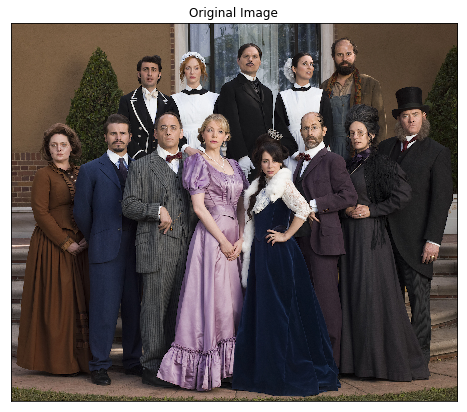

In [7]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Number of people detected: 13
predicted Gender : Female
predicted Gender : Female
predicted Gender : Female
predicted Gender : Female
predicted Gender : Female
predicted Gender : Female
predicted Gender : Male
predicted Gender : Male
predicted Gender : Female
predicted Gender : Female
predicted Gender : Female
predicted Gender : Male
predicted Gender : Male


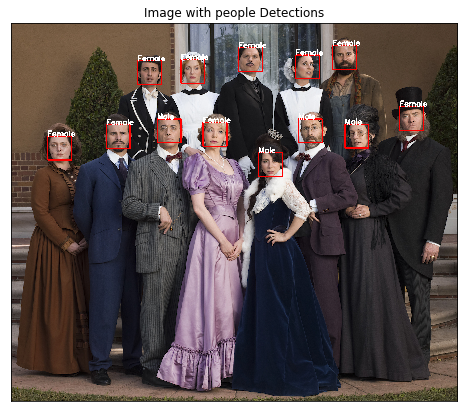

In [8]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of people detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)


    
 
# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    face_img = image_with_detections[y:y+h, h:h+w].copy()
    blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    gender_net.setInput(blob)
    gender_preds = gender_net.forward()
    gender = gender_list[gender_preds[0].argmax()]
    print("predicted Gender : " + gender)

    gender = gender_list[gender_preds[0].argmax()]
   
    cv2.putText(image_with_detections, gender,(x,y),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)
                
    
# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with people Detections')
ax1.imshow(image_with_detections)

In [11]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes


In [18]:
def laptop_camera_people_detector():
    
    cv2.namedWindow("People Counter activated")
    tracker = cv2.TrackerCSRT_create()

# Create a VideoCapture object and read from input file
# If the input is taken from the camera, pass 0 instead of the video file name.
 
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        print("Error opening video stream or file")
        rval = False
    vc.set(3, 480) #set width of the frame
    vc.set(4, 640) #set height of the frame
    # Keep the video stream open
    while rval:
        # Plot the image from camera with all the face and eye detections marked
        # Display the resulting frame
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        #faces = face_cascade.detectMultiScale(gray, 1.25, 3)
        if ( len(faces) > 0): #and implement not same person
            print('Number of people detected:', len(faces))
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)
        
        #eyes = eye_cascade.detectMultiScale(gray, 1.1, 6)
        #print('Number of people detected:', len(eyes))
        #for (x,y,w,h) in eyes:
        #    cv2.rectangle(frame, (x,y), (x+w,y+h),(255,0,0), 3) 
        
        #Get Face 
            face_img = frame[y:y+h, h:h+w].copy()
            blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=True)
            #blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

        
        #Predict Gender
            gender_net.setInput(blob)
            gender_preds = gender_net.forward()
            gender = gender_list[gender_preds[0].argmax()]
            print("predicted Gender : " + gender)
#Predict Age
            age_net.setInput(blob)
            age_preds = age_net.forward()
            age = age_list[age_preds[0].argmax()]
            print("Predicted Age Range: " + age)

            overlay_text = "%s %s" % (gender, age)
            people_counter = "%s %s" % ("people count", len(faces))
            cv2.putText(frame, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(frame, people_counter, (0, 30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow("people detection activated", frame)
        
        
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.10)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [21]:
# Call the laptop camera people detector function above, press any key to exit
laptop_camera_people_detector()

Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Male
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Male
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age 

predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Male
Predicted Age Range: (4, 6)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 2
predicted Gender : Male
Predicted Age Range: (38, 43)
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Female
Predicted Age Range: (15, 20)
Number of people detected: 2
predicted Gender : Male
Predicted Age Range: (38, 43)
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 2
predicted Gender : Male
Predicted Age Range: (38, 43)
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 2
predicted Gender : Male
Predicted Age Range: (38, 43)
predicted Gender : Female
Predicted Age Range: (25, 32)
Number of people detected: 1
predicted Gender : Fema